<a href="https://colab.research.google.com/github/bharat-avs/Energy-consumption-Estimation-from-machine-load-shift-duration/blob/main/Energy_consumption_Estimation_from_machine_load_shift_duration_and_ambient_conditions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: AVS Bharat Chowdary USN: 1CD24IC005 Banch: CSE(IOT and cybersecurity including blockchain technology)
College: Cambridge Institute of Technology K.R Puram
E-mail: avsbharat@gmail.com or bharat.24iot@cambridge.edu.in

#**Energy consumption Estimation from machine load shift duration**
this project aims in developing a predictive analytics model that accurately estimates the energy consumption of industrial machinery by analyzing the correlations between operational load, shift timing, and environmental ambient factors

##**problem statement**
Industrial facilities often struggle with unpredictable utility costs because energy consumption is heavily influenced by fluctuating machine loads, varying shift durations, and changing ambient environmental factors (like temperature and humidity)

###**Importing required libraries for the project**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler

##**we are loding the dataset with the help of below code**

In [24]:
df = pd.read_csv('/content/energy_consumption.csv')

In [26]:
df.head()

,machine_load_percent,shift_duration_hours,ambient_temp_c,machine_age_years,equipment_type,power_supply,maintenance_interval,operating_mode,voltage_stability,season,energy_consumed_kwh
0,58.722442,NaN,23.683254,2.309649,Pump,Generator,Monthly,Continuous,Stable,Spring,1100.227423
1,78.221874,9.488840,21.236102,13.643749,Pump,Solar,Annual,Intermittent,Stable,Summer,597.013874
2,89.721257,9.166522,19.023934,0.131779,NaN,Generator,Monthly,Continuous,Stable,Spring,197.697537
3,47.981773,8.316916,25.075593,6.519075,Furnace,Grid,Monthly,Intermittent,Stable,Winter,NaN
4,95.119687,11.083868,32.049599,0.322186,Furnace,Generator,Monthly,NaN,Unstable,Winter,125.378358


# **Intial data**


In [30]:
df.shape

(1000, 11)

In [31]:
df.info

<bound method DataFrame.info of      machine_load_percent  shift_duration_hours  ambient_temp_c  \
0               58.722442                   NaN       23.683254   
1               78.221874              9.488840       21.236102   
2               89.721257              9.166522       19.023934   
3               47.981773              8.316916       25.075593   
4               95.119687             11.083868       32.049599   
..                    ...                   ...             ...   
995             53.362098              8.778336       30.563746   
996             69.287465             10.356173       32.962538   
997             52.984678             10.966171       18.344472   
998             70.567872             10.432242       29.627221   
999             41.846873             11.974546       30.073532   

     machine_age_years equipment_type power_supply maintenance_interval  \
0             2.309649           Pump    Generator              Monthly   
1            13.643749           Pump        Solar               Annual   
2             0.131779            NaN    Generator              Monthly   
3             6.519075        Furnace         Grid              Monthly   
4             0.322186        Furnace    Generator              Monthly   
..                 ...            ...          ...                  ...   
995           2.868256     Compressor         Grid               Annual   
996           6.513094           Pump         Grid               Weekly   
997          14.385534          Motor        Solar               Weekly   
998           1.420566        Furnace    Generator               Weekly   
999          11.870285        Furnace        Solar              Monthly   

    operating_mode voltage_stability  season  energy_consumed_kwh  
0       Continuous            Stable  Spring          1100.227423  
1     Intermittent            Stable  Summer           597.013874  
2       Continuous            Stable  Spring           197.697537  
3     Intermittent            Stable  Winter                  NaN  
4              NaN          Unstable  Winter           125.378358  
..             ...               ...     ...                  ...  
995   Intermittent            Stable  Autumn          1586.518660  
996          Batch          Moderate  Summer          1940.641443  
997          Batch          Unstable  Autumn           225.996404  
998     Continuous               NaN  Spring          1505.384733  
999   Intermittent          Unstable  Autumn          1211.888123  

[1000 rows x 11 columns]>

#**Data cleaning**
Data cleaning involves handling missing values and preparing the dataset for analysis and modeling.

In [33]:
df.isnull().sum()

,0
machine_load_percent,41
shift_duration_hours,50
ambient_temp_c,62
machine_age_years,60
equipment_type,63
power_supply,51
maintenance_interval,42
operating_mode,53
voltage_stability,47
season,57


#**Numerical and categoriyal columns seperate**


In [35]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

num_cols, cat_cols

(Index(['machine_load_percent', 'shift_duration_hours', 'ambient_temp_c',
        'machine_age_years', 'energy_consumed_kwh'],
       dtype='object'),
 Index(['equipment_type', 'power_supply', 'maintenance_interval',
        'operating_mode', 'voltage_stability', 'season'],
       dtype='object'))

### Boxplot for Energy Consumed

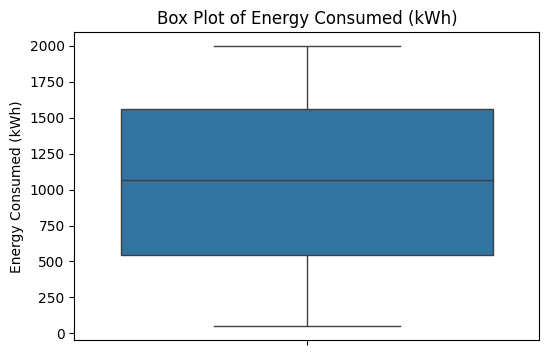

In [38]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['energy_consumed_kwh'])
plt.title("Box Plot of Energy Consumed (kWh)")
plt.ylabel("Energy Consumed (kWh)")
plt.show()

In [4]:
df.isnull().sum()

,0
machine_load_percent,41
shift_duration_hours,50
ambient_temp_c,62
machine_age_years,60
equipment_type,63
power_supply,51
maintenance_interval,42
operating_mode,53
voltage_stability,47
season,57


<Axes: xlabel='None', ylabel='None'>

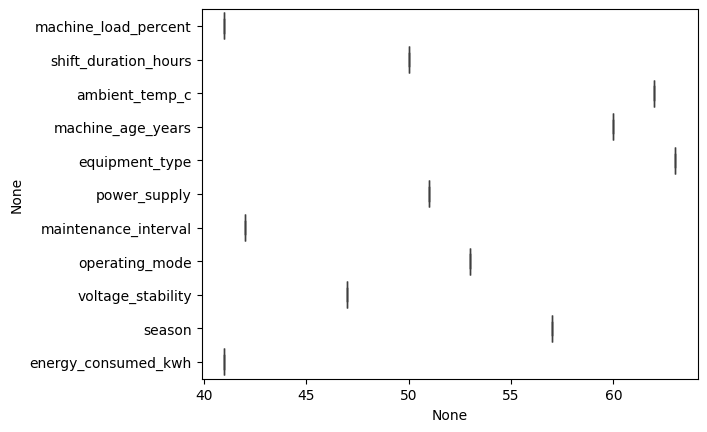

In [5]:
sns.boxplot(x=df.isnull().sum(),
            y=df.isnull().sum().index)

In [7]:
df['equipment_type'].value_counts()

,count
equipment_type,
Furnace,254
Pump,235
Compressor,229
Motor,219


--- Scatter Plot: Machine Load vs. Shift Duration ---


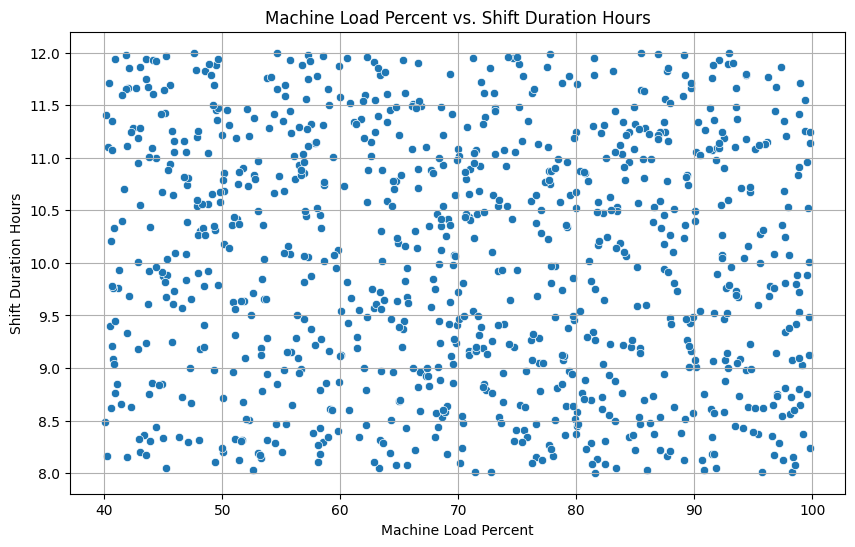


--- Histograms for Numerical Columns ---


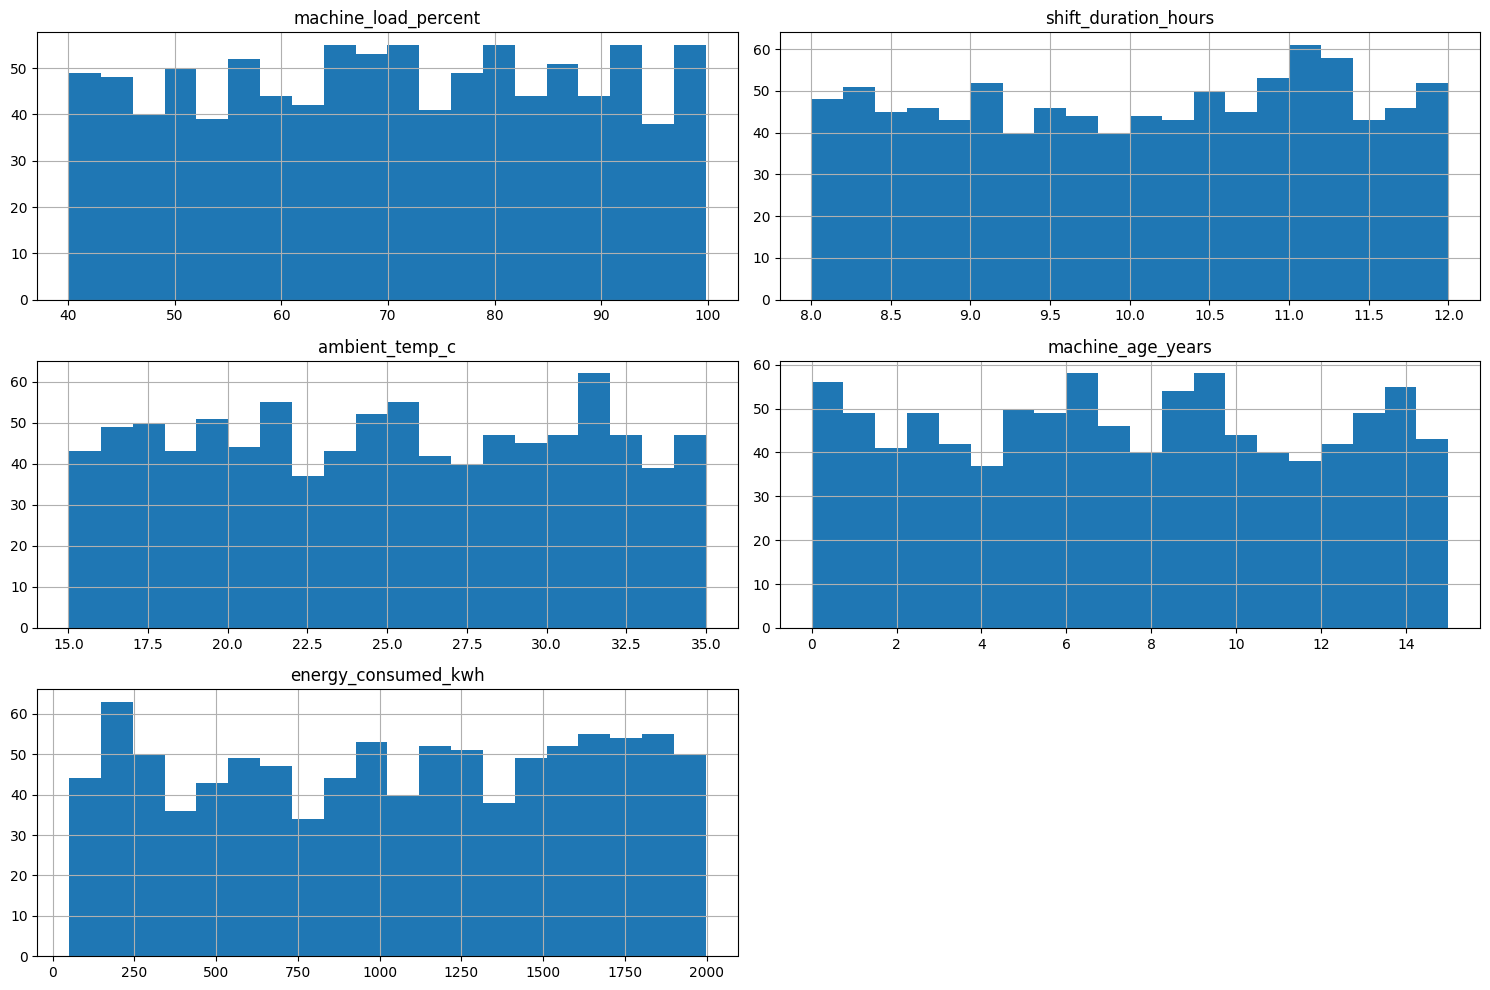


--- Bar Plot for Equipment Type ---


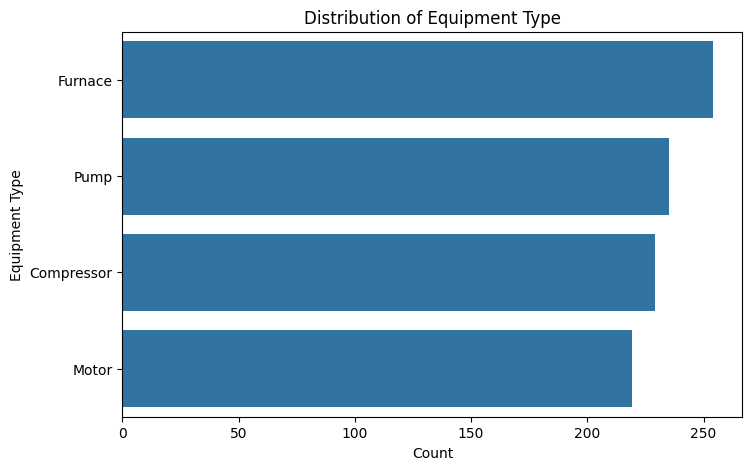


--- Pair Plot for Numerical Columns (relationships overview) ---


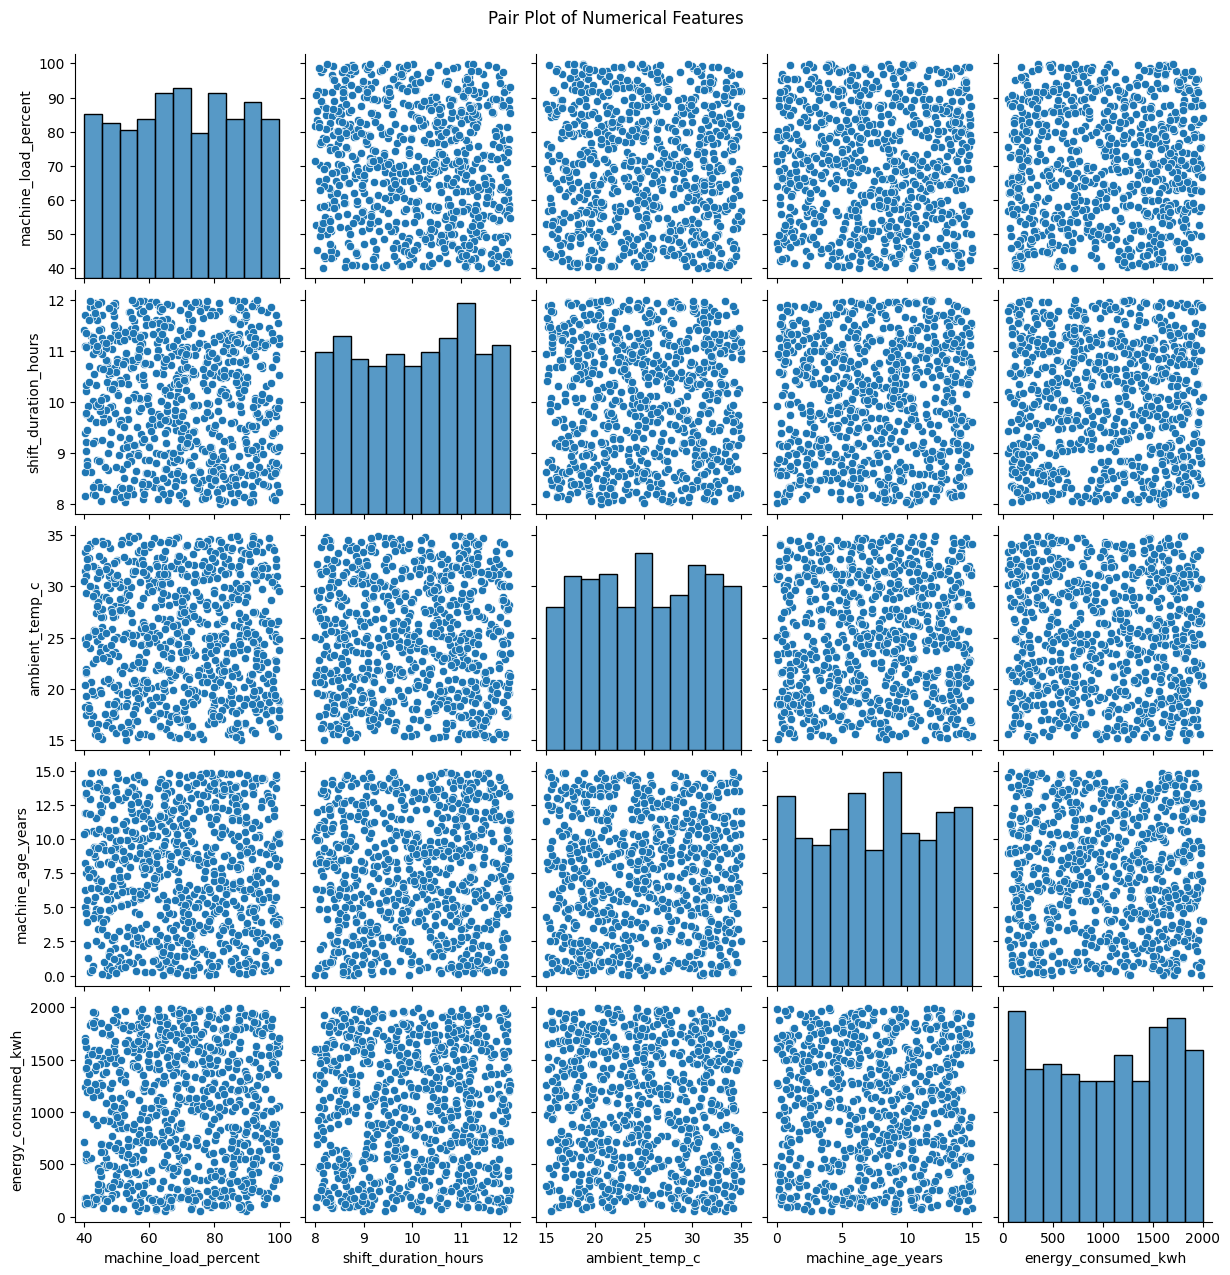

In [13]:
print(' Scatter Plot: Machine Load vs. Shift Duration ')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='machine_load_percent', y='shift_duration_hours', data=df)
plt.title('Machine Load Percent vs. Shift Duration Hours')
plt.xlabel('Machine Load Percent')
plt.ylabel('Shift Duration Hours')
plt.grid(True)
plt.show()

print('\nHistograms for Numerical Columns ')
df.select_dtypes(include=np.number).hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

print('\n Bar Plot for Equipment Type ')
plt.figure(figsize=(8, 5))
sns.countplot(y='equipment_type', data=df, order=df['equipment_type'].value_counts().index)
plt.title('Distribution of Equipment Type')
plt.xlabel('Count')
plt.ylabel('Equipment Type')
plt.show()

print('\n Pair Plot for Numerical Columns (relationships overview)')
sns.pairplot(df.select_dtypes(include=np.number).dropna())
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

In [10]:
df['maintenance_interval'].value_counts()

,count
maintenance_interval,
Monthly,266
Annual,239
Quarterly,237
Weekly,216


In [11]:
df['operating_mode'].value_counts()

,count
operating_mode,
Batch,322
Continuous,321
Intermittent,304


In [12]:
df['voltage_stability'].value_counts()

,count
voltage_stability,
Moderate,328
Stable,326
Unstable,299


 Distribution Plot for Energy Consumed 


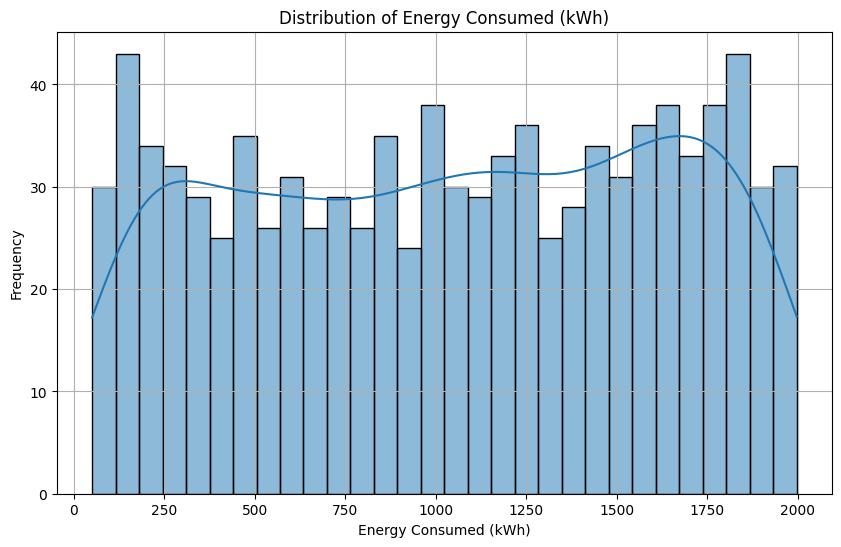

In [15]:
print(' Distribution Plot for Energy Consumed ')
plt.figure(figsize=(10, 6))
sns.histplot(df['energy_consumed_kwh'].dropna(), kde=True, bins=30)
plt.title('Distribution of Energy Consumed (kWh)')
plt.xlabel('Energy Consumed (kWh)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 1. Data Preparation for Linear Regression



In [21]:
# Select features and target
X = df[['machine_load_percent']]
y = df['energy_consumed_kwh']

# Combine X and y to drop rows with NaN values in either column
data_for_model = pd.concat([X, y], axis=1).dropna()

X_clean = data_for_model[['machine_load_percent']]
y_clean = data_for_model['energy_consumed_kwh']

print(f"Original data points: {len(df)}")
print(f"Data points after dropping NaNs: {len(data_for_model)}")

Original data points: 1000
Data points after dropping NaNs: 921


### 2. Train a Linear Regression Model

Now, let's train a simple linear regression model using our cleaned data.

In [22]:
model = LinearRegression()
model.fit(X_clean, y_clean)

print("Linear Regression model trained successfully!")

Linear Regression model trained successfully!


### 3. Access Regression Model Attributes: `coef`, `intercept`, and `predict`

Here's how you can access the model's coefficient, intercept, and make predictions.

In [20]:
print(f"Regression Model Coefficient (coef_): {model.coef_[0]:.4f}")
print(f"Regression Model Intercept (intercept_): {model.intercept_:.4f}")

# Example of using .predict()
# Let's predict energy consumption for a machine load of 60% and 85%
sample_loads = np.array([[60], [85]])
predicted_energy = model.predict(sample_loads)

print(f"\nPredicted energy for 60% machine load: {predicted_energy[0]:.2f} kWh")
print(f"Predicted energy for 85% machine load: {predicted_energy[1]:.2f} kWh")

Regression Model Coefficient (coef_): 0.2730
Regression Model Intercept (intercept_): 1024.5793

Predicted energy for 60% machine load: 1040.96 kWh
Predicted energy for 85% machine load: 1047.78 kWh


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


4. Scatter Plot with Regression Line



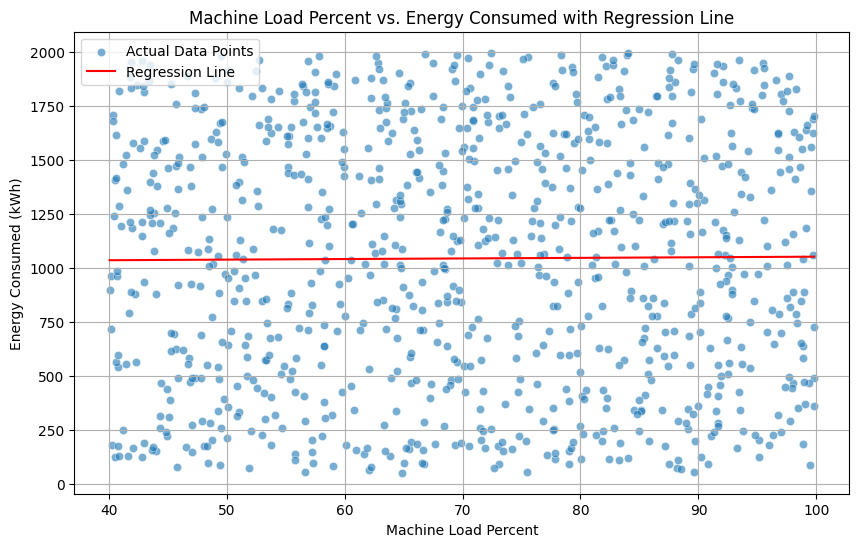

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_clean['machine_load_percent'], y=y_clean, alpha=0.6, label='Actual Data Points')
sns.lineplot(x=X_clean['machine_load_percent'], y=model.predict(X_clean), color='red', label='Regression Line')
plt.title('Machine Load Percent vs. Energy Consumed with Regression Line')
plt.xlabel('Machine Load Percent')
plt.ylabel('Energy Consumed (kWh)')
plt.grid(True)
plt.legend()
plt.show()